<a href="https://colab.research.google.com/github/suti333/Crop-Disease/blob/main/Crop_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading the Dataset



In [1]:
!wget https://www.dropbox.com/s/r6zdqqtpo7qfetu/Crop%20Disease%20Dataset.zip?dl=0

--2023-11-28 12:39:15--  https://www.dropbox.com/s/r6zdqqtpo7qfetu/Crop%20Disease%20Dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/r6zdqqtpo7qfetu/Crop%20Disease%20Dataset.zip [following]
--2023-11-28 12:39:15--  https://www.dropbox.com/s/raw/r6zdqqtpo7qfetu/Crop%20Disease%20Dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf967125856a1092bc995ca3b4e.dl.dropboxusercontent.com/cd/0/inline/CIbRF_VWMOVfrvsnXPH5sh7VFFF_Nt9roq_ngy6EcgdnHB7re0dhTHzvpzxHbf4SL2Urrkw0F6Hn47w4-7AGeE8CCjcUUhaFL2XVC7kmD6WRGCuk1IPXwChNACxVCqpTGACI0m_mXxS_ZsNozdyAJBvM/file# [following]
--2023-11-28 12:39:16--  https://ucf967125856a1092bc995ca3b4e.dl.dropboxusercontent.com/cd/0/inline/CIbRF_VWMOVfrvsnXPH5sh7VFFF_Nt9roq_ngy6EcgdnHB7re

## Unzipping the Dataset

In [2]:
!unzip Crop\ Disease\ Dataset.zip\?dl\=0

Streaming output truncated to the last 5000 lines.
  inflating: Crop Disease Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Unhealthy/a75e41ac-5944-4698-876b-1d0716934982___GCREC_Bact.Sp 5970.JPG  
  inflating: Crop Disease Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Unhealthy/a75ed4a7-c1c6-4c44-ab20-61326f59021b___GCREC_Bact.Sp 3587.JPG  
  inflating: Crop Disease Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Unhealthy/a7609a35-fd75-4ec3-868a-eb97b9ffd096___FREC_Scab 3032_new30degFlipLR.JPG  
  inflating: Crop Disease Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Unhealthy/a768a3ed-74df-4223-a9ec-9c58663d2323___RS_GLSp 4496 copy_new30degFlipLR.jpg  
  inflating: Crop Disease Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Unhealthy/a76ebe42-b9c1-4848-8b89-b62ef6e1a91c__

Load and display two images: one healthy plant image and one unhealthy plant image.

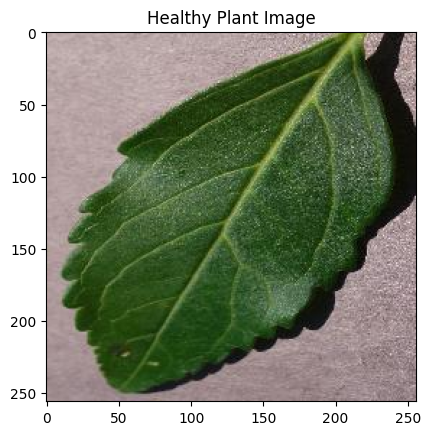

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Healthy plant image
img = mpimg.imread('/content/Crop Disease Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Healthy/0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092_flipTB.JPG')
imgplot = plt.imshow(img)
plt.title("Healthy Plant Image")
plt.show()

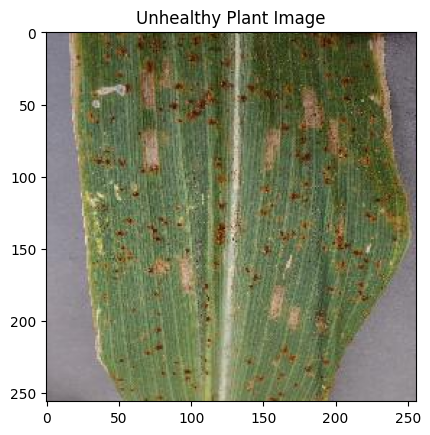

In [6]:
# Unhealthy plant image
img = mpimg.imread('/content/Crop Disease Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Unhealthy/038464d1-47a9-4169-afb1-72c87e568a95___RS_GLSp 4480.JPG')
imgplot = plt.imshow(img)
plt.title("Unhealthy Plant Image")
plt.show()

## Importing Libraries

In [7]:
import numpy as np
import pickle
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import backend as K
from tensorflow.keras.optimizers.legacy import Adam

## Initializing Constants

In [19]:
EPOCHS = 10
INITIAL_LR = 1e-4
BATCH_SIZE = 8
width = 256
height = 256
depth = 3

In [9]:
train_dir = '/content/Crop Disease Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
validation_dir = '/content/Crop Disease Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

## Checking Shape of Image

In [10]:
inputShape = (height, width, depth)
chanDim=-1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1

## Image Data Generation

ImageDataGenerator from Keras is used to generate augmented training data and normal testing data. Augmentation includes rescaling, shearing, zooming, and horizontal flipping.

In [11]:
train_gen = ImageDataGenerator(rescale=1.0/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_gen = ImageDataGenerator(rescale=1.0/255)

In [12]:
train_generator = train_gen.flow_from_directory(train_dir, target_size=(width, height), batch_size=BATCH_SIZE, class_mode='binary', classes=['Healthy', 'Unhealthy'])
validation_generator = test_gen.flow_from_directory(validation_dir, target_size=(width, height), batch_size=BATCH_SIZE, class_mode='binary')

Found 70295 images belonging to 2 classes.
Found 17572 images belonging to 2 classes.


## Visual Representation of Image Data Generation

A subplot of 15 images is created to visualize some sample images from the training data.

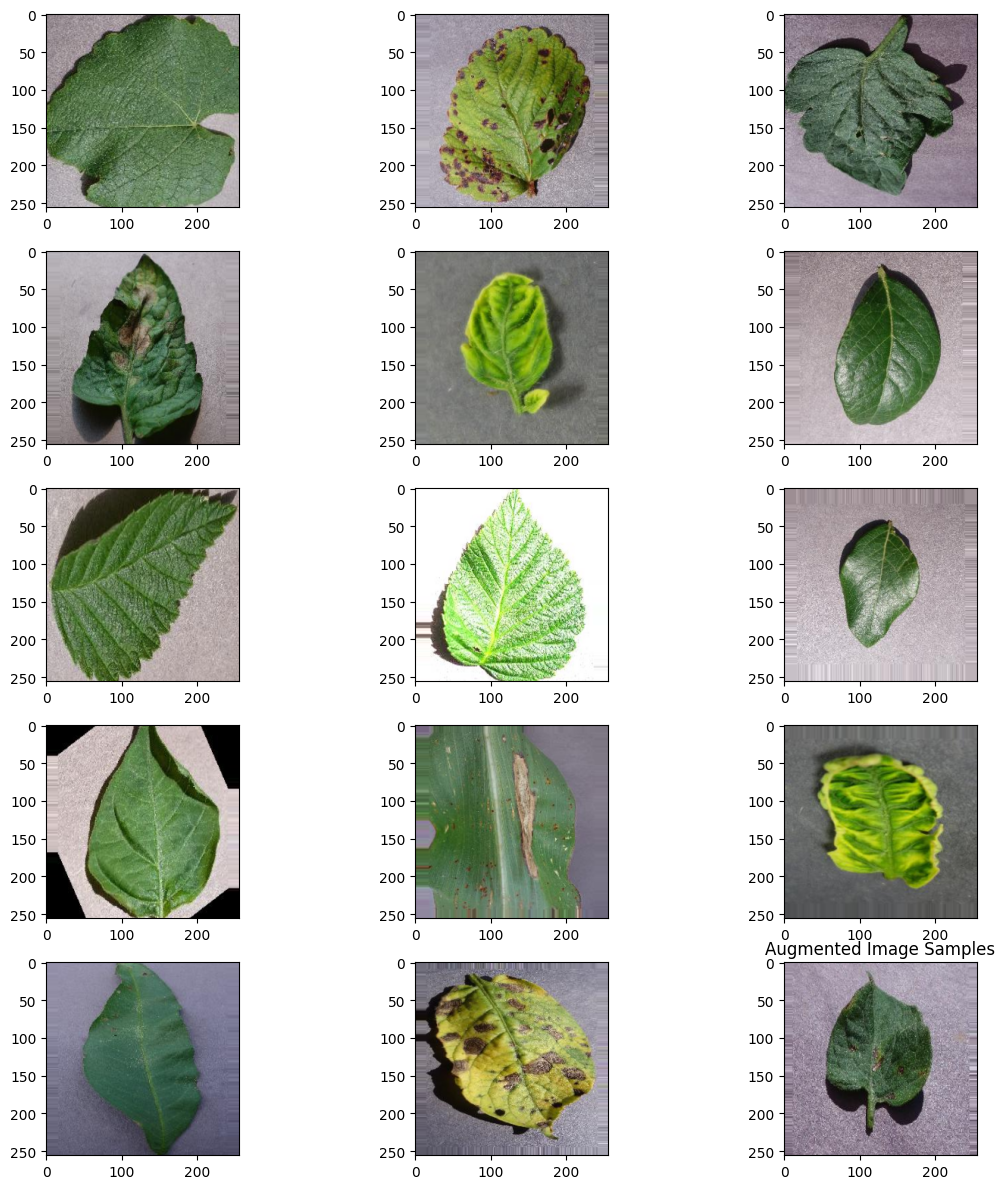

In [14]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for x_batch, y_batch in train_generator:
        img = x_batch[0]
        plt.imshow(img)
        break
plt.tight_layout()
plt.title("Augmented Image Samples")
plt.show()

## Modelling

Architecture of the CNN Model:

Convolutional Layers: Two sets of convolutional layers are added. Each set consists of two Conv2D layers with 32, 64, and 128 filters, respectively. The filters have a size of (3, 3), use the "relu" activation function, and have "same" padding to maintain spatial dimensions.

Batch Normalization: Batch normalization layers are added after each convolutional layer. Batch normalization helps stabilize and accelerate training by normalizing the input to each layer.

MaxPooling Layers: MaxPooling2D layers with a pool size of (3, 3) are added after each pair of convolutional layers. Max pooling reduces spatial dimensions and extracts key features.

Dropout Layers: Dropout layers with a rate of 0.25 are added after each max pooling layer. Dropout is a regularization technique that helps prevent overfitting by randomly dropping a fraction of input units during training.

Flatten Layer: A Flatten layer is added to transform the 3D output to a 1D vector, preparing it for the fully connected layers.

Fully Connected Layers: A Dense layer with 1568 units and "relu" activation is added, followed by a Dropout layer with a rate of 0.5. This serves as a fully connected layer with dropout for regularization.

Output Layer: The final Dense layer has 2 units (for binary classification - healthy or unhealthy) with the "softmax" activation function, providing probabilities for each class.

In [15]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=inputShape))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(3, 3))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(3, 3))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(3, 3))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1568,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 batch_normalization (Batch  (None, 256, 256, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 85, 85, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 85, 85, 64)        1

## Compiling the Model

The model is compiled using the Adam optimizer, sparse categorical crossentropy loss function, and accuracy as the metric.

In [16]:
opt = Adam(learning_rate=INITIAL_LR, decay=INITIAL_LR/EPOCHS)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 batch_normalization (Batch  (None, 256, 256, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 85, 85, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 85, 85, 64)        1

## Fitting the Model

In [20]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator) // BATCH_SIZE,
    epochs=EPOCHS, verbose=1
    )

Epoch 1/10
274/274 [==============================] - 191s 695ms/step - loss: 0.2654 - accuracy: 0.8807 - val_loss: 1.7311 - val_accuracy: 0.6291
Epoch 2/10
274/274 [==============================] - 192s 701ms/step - loss: 0.2334 - accuracy: 0.9064 - val_loss: 0.6494 - val_accuracy: 0.8088
Epoch 3/10
274/274 [==============================] - 190s 695ms/step - loss: 0.1900 - accuracy: 0.9208 - val_loss: 1.6954 - val_accuracy: 0.6928
Epoch 4/10
274/274 [==============================] - 190s 694ms/step - loss: 0.1777 - accuracy: 0.9333 - val_loss: 0.7420 - val_accuracy: 0.7840
Epoch 5/10
274/274 [==============================] - 190s 694ms/step - loss: 0.1444 - accuracy: 0.9411 - val_loss: 1.3528 - val_accuracy: 0.7730
Epoch 6/10
274/274 [==============================] - 191s 697ms/step - loss: 0.1377 - accuracy: 0.9446 - val_loss: 0.5206 - val_accuracy: 0.8632
Epoch 7/10
274/274 [==============================] - 190s 693ms/step - loss: 0.1212 - accuracy: 0.9559 - val_loss: 0.9324 -

## Visualizing Training History

Visualizing the training and validation accuracy and loss over epochs

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

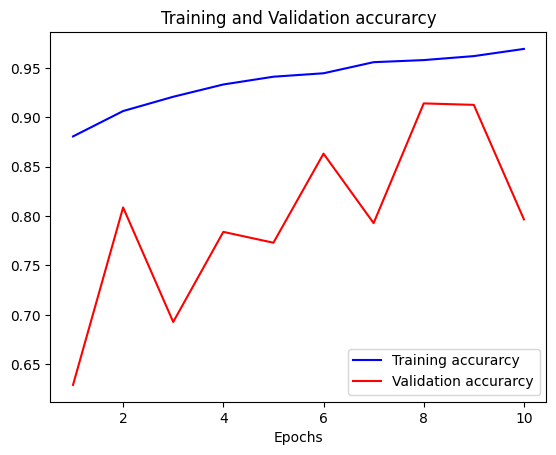

In [31]:
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

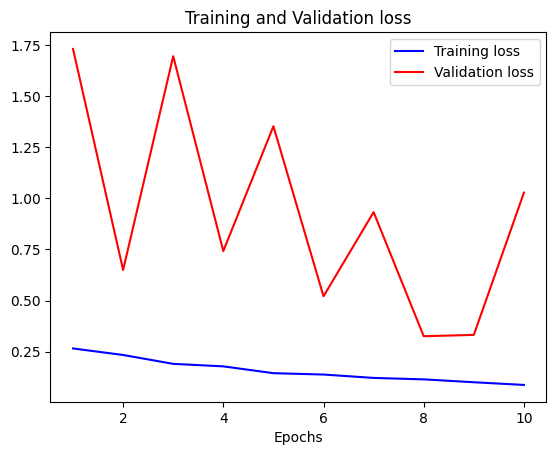

In [32]:
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [27]:
print("Train Accuracy  : {:.2f} %".format(acc[-1]*100))

Train Accuracy  : 96.93 %


## Saving the Model

In [28]:
pickle.dump(model, open('cnn_model.pkl', 'wb'))